# To refresh, click:
- Cell
- Run All

# Daily Increase of confirmed cases
This notebook shows visualisations of new confirmed cases per day.<br>
datasource: https://github.com/openZH/covid_19

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
# the following lines are for future versions of python
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

## Read Data

In [29]:
cantons = ['AG','AI','AR','BE','BL','BS','FR','GE','GL','GR','JU','LU','NE',
           'NW','OW','SG','SH','SO','SZ','TG','TI','UR','VD','VS','ZG','ZH']

url_head = 'https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_total_csv/COVID19_Fallzahlen_Kanton_'
url_tail = '_total.csv'

# create empty list for DataFrames
dataframes = []

for c in cantons:
    url = url_head + c + url_tail
    tmp = pd.read_csv(url) 
    tmp['date'] = pd.to_datetime(tmp['date'], dayfirst=True)
    dataframes.append(tmp)

time_read = datetime.datetime.now().strftime("%Y-%m-%d, %H:%M")
df = pd.concat(dataframes)
#df = pd.concat(dataframes, sort = False)  this is for future versions of python
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.rename(columns={"abbreviation_canton_and_fl": "canton"},inplace=True)
df.reset_index()

# remove non integer columns
#df.drop(columns = ["time","source"],inplace=True)
df.head()


,TotalCured,TotalPosTests1,canton,date,ncumul_ICF,ncumul_ICU,ncumul_ICU_intub,ncumul_conf,ncumul_deceased,ncumul_deceased_suspect,ncumul_hosp,ncumul_released,ncumul_tested,ncumul_vent,source,time
0,NaN,NaN,AG,2020-02-28,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
1,NaN,NaN,AG,2020-03-02,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,18:00
2,NaN,NaN,AG,2020-03-03,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
3,NaN,NaN,AG,2020-03-04,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
4,NaN,NaN,AG,2020-03-05,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00


## Create DataFrame with cumulated confirmed cases
One row per day and one column per canton 

In [30]:
df_confirmed = df.pivot(index='date', columns='canton',values='ncumul_conf')
df_confirmed.tail()

canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,241.0,NaN,30.0,470.0,302.0,376.0,226.0,1509.0,NaN,NaN,...,30.0,95.0,NaN,81.0,1165.0,22.0,1822.0,527.0,62.0,1068.0
2020-03-24,266.0,8.0,33.0,532.0,306.0,414.0,255.0,1598.0,33.0,276.0,...,32.0,104.0,NaN,87.0,1211.0,25.0,2162.0,606.0,72.0,1211.0
2020-03-25,319.0,9.0,34.0,624.0,341.0,466.0,293.0,1708.0,40.0,322.0,...,34.0,129.0,99.0,96.0,1354.0,NaN,2215.0,651.0,80.0,1363.0
2020-03-26,349.0,11.0,42.0,660.0,422.0,505.0,309.0,1743.0,43.0,373.0,...,35.0,141.0,99.0,110.0,1401.0,38.0,NaN,715.0,87.0,1476.0
2020-03-27,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,1578.0


## Fill missing values with previous values

In [31]:
df_confirmed.fillna(method='pad', inplace=True)

# Switzerland total = sum over all cantons
df_confirmed["CH_cumul_conf"] = df_confirmed.loc[:,'AG':'ZH'].sum(axis = 1)
df_confirmed.tail()

canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,CH_cumul_conf
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,241.0,6.0,30.0,470.0,302.0,376.0,226.0,1509.0,31.0,266.0,...,95.0,13.0,81.0,1165.0,22.0,1822.0,527.0,62.0,1068.0,9051.0
2020-03-24,266.0,8.0,33.0,532.0,306.0,414.0,255.0,1598.0,33.0,276.0,...,104.0,13.0,87.0,1211.0,25.0,2162.0,606.0,72.0,1211.0,10040.0
2020-03-25,319.0,9.0,34.0,624.0,341.0,466.0,293.0,1708.0,40.0,322.0,...,129.0,99.0,96.0,1354.0,25.0,2215.0,651.0,80.0,1363.0,11063.0
2020-03-26,349.0,11.0,42.0,660.0,422.0,505.0,309.0,1743.0,43.0,373.0,...,141.0,99.0,110.0,1401.0,38.0,2215.0,715.0,87.0,1476.0,11781.0
2020-03-27,349.0,11.0,43.0,660.0,422.0,505.0,309.0,1743.0,43.0,373.0,...,141.0,99.0,110.0,1401.0,38.0,2215.0,715.0,94.0,1578.0,11892.0


## New confirmed cases per day
New confirmed cases per day is an important information. It's calculated as numeric, first time derivative of cumlated cases.

In [32]:
# calculate New confirmed cases per day from cumulated cases
df_confirmed["CH_increase_conf"] = df_confirmed["CH_cumul_conf"] - df_confirmed["CH_cumul_conf"].shift(1)

## Less cases confirmed on weekends
On weekends (grey), there are less cases confirmed than on workdays (blue). A considerable number of cases from weekends seem to be added on Mondays. This might be interpreted as huge increase.

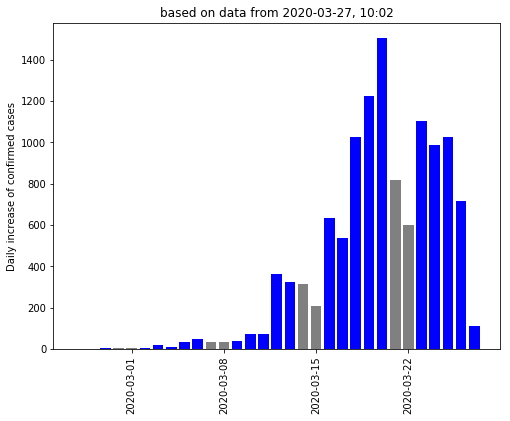

In [33]:
# set color = blue for workdays. Grey on weekends.
df_confirmed["color"] = np.where(df_confirmed.index.dayofweek < 5,'blue','grey')

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
plt.title("based on data from "+time_read)
ax.set_ylabel("Daily increase of confirmed cases")
plt.bar(df_confirmed.index,df_confirmed['CH_increase_conf'],color=df_confirmed['color'])
plt.show()

## Moving averages
Because of the influence of weekends and other fluctuations, new confirmed cases per day are difficult to interpret in the plot above.<br>
Moving averages may be more reliable.

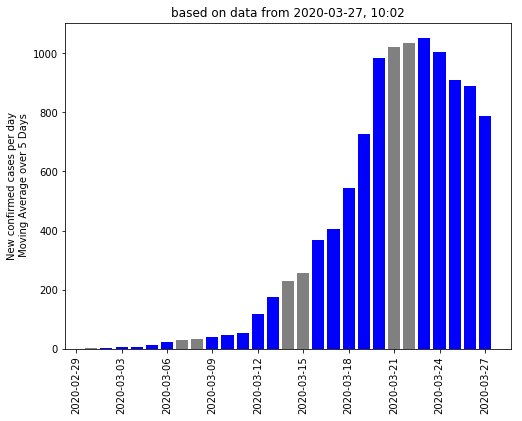

In [34]:
w = 5 # width of moving average
df_confirmed['mave'] = df_confirmed['CH_increase_conf'].rolling(window=w,center=False).mean()
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
plt.title("based on data from "+time_read)
ax.set_ylabel("New confirmed cases per day\n Moving Average over " + str(w) + " Days")
plt.bar(df_confirmed.index,df_confirmed['mave'],color=df_confirmed['color'])
plt.show()